Refs:

- Original paper: Kirkpatrick, S., Gelatt, C.D., and Vecchi, M.P., “Optimization by Simulated
Annealing,” Science, Volume 220, Number 4598, 13 May 1983, pp. 671-
680

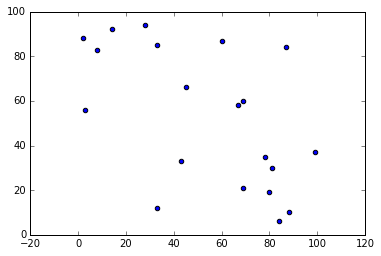

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
w_size = 100
n_cities = 20
cities = (np.random.random((n_cities,2))*w_size).astype(int)
cities = np.array([[ 2,88],[87,84],[84,6],[99,37], [60, 87], [ 8, 83], [43, 33], [45, 66], [28, 94], [ 3, 56], [14, 92], [88, 10], [33, 12], [33, 85], [69, 60], [67, 58], [80, 19], [81, 30], [69, 21], [78, 35]])
plt.scatter(cities[:,0], cities[:,1])
def TSP_cost(cities, solution):
    sol_cities = cities[solution]
    return np.sum(np.sqrt(np.sum((sol_cities - np.roll(sol_cities,-1, axis=0))**2, axis=1)))

In [2]:
sol = np.random.permutation(len(cities))
print sol

[ 4 19  0  5 15 12 18  1  2  6 11  7 10 16 17 14  9  3  8 13]


## Creamos una función que para obtener un _vecino_ de cualquier solución

In [14]:
def TSP_neighbour(solution):
    i1 = np.random.randint(len(solution))
    i2 = i1+1 if i1<len(solution)-1 else 0
    r = np.copy(solution)
    r[i1]=solution[i2]
    r[i2]=solution[i1]
    return r


def TSP_neighbour2(solution):
    return TSP_neighbour(TSP_neighbour(solution))

## Usamos las mismas funciones para el TSP de las notas anteriores

In [4]:
def TSP_initialize_population(n_individuals, n_cities):
    r = []
    for i in xrange(n_individuals):
        r.append(np.random.permutation(n_cities))
    return np.array(r)

def TSP_cost(cities, solution):
    sol_cities = cities[solution]
    return np.sum(np.sqrt(np.sum((sol_cities - np.roll(sol_cities,-1, axis=0))**2, axis=1)))

def TSP_plot_solution(cities, solution):
    plt.scatter(cities[:,0], cities[:,1])
    plt.plot(cities[solution,0].tolist()+[cities[solution[0],0]], cities[solution,1].tolist()+[cities[solution[0],1]])
    plt.scatter(cities[solution[0],0], cities[solution[0],1], marker="x", s=60, c="red", lw="5")
    plt.title("cost %.3f"%(TSP_cost(cities, solution)))
    
def TSP_plot_result(best, bests, means, stds):
    fig = plt.figure(figsize=(12,4))
    fig.add_subplot(121)
    plot_evolution(bests, means, stds)
    fig.add_subplot(122)
    TSP_plot_solution(cities, best)

## Hemos un bucle bajando la temperatura

In [5]:
%%writefile code/sa.py

import numpy as np
import matplotlib.pyplot as plt

def plot_evolution(bests, means, stds):
    plt.plot(means, label="means")
    plt.plot(bests, label="bests")
    plt.fill_between(range(len(means)), means-stds, means+stds, color="yellow", alpha=0.2)
    plt.legend()

def run_sa(n_individuals, n_cooling_steps, init_population_function, cost_function, generate_neighbor_function):

    pop = init_population_function(n_individuals)

    mean_costs = []
    std_costs  = []
    best_costs = []
    best_sols  = []

    min_cost = np.inf
    min_sol  = None

    for T in np.linspace(1,0,n_cooling_steps):
        costs = []
        for i in range(len(pop)):
            sol = pop[i]
            cost_sol = cost_function(sol)

            # generate a neighbour
            nbr = generate_neighbor_function(sol)
            cost_nbr = cost_function(nbr)

            # if the neighbour is better
            if cost_nbr<cost_sol or np.random.random()<T:
                sol = nbr
                cost_sol = cost_nbr

            pop[i] = sol
            costs.append(cost_sol)

            if cost_sol < min_cost:
                min_sol  = np.copy(pop[i])
                min_cost = cost_function(pop[i])

        best_costs.append(np.min(costs))
        mean_costs.append(np.mean(costs))
        std_costs.append(np.std(costs))

    mean_costs = np.array(mean_costs)
    std_costs  = np.array(std_costs)
    best_costs = np.array(best_costs)
    
    return min_sol, best_costs, mean_costs, std_costs
    

Overwriting code/sa.py


## Con pocos individuos y pocos pasos de enfrieamiento

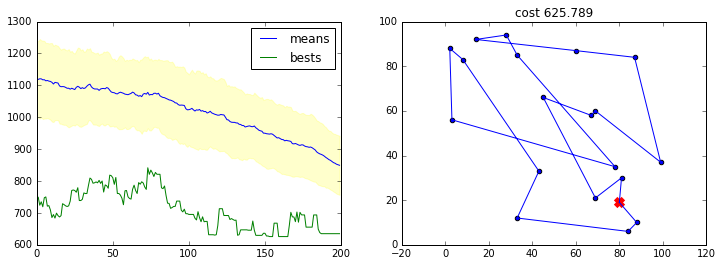

In [12]:
%run code/sa.py

n_individuals = 200
n_cooling_steps = 200


bestsol, bests, means, stds = run_sa(n_individuals              = n_individuals, 
                                     n_cooling_steps            = n_cooling_steps, 
                                     init_population_function   = lambda x: TSP_initialize_population(x, n_cities), 
                                     cost_function              = lambda x: TSP_cost(cities, x),
                                     generate_neighbor_function = TSP_neighbour)


TSP_plot_result(bestsol, bests, means, stds)

## Con pocos individuos y muchos pasos de enfrieamiento

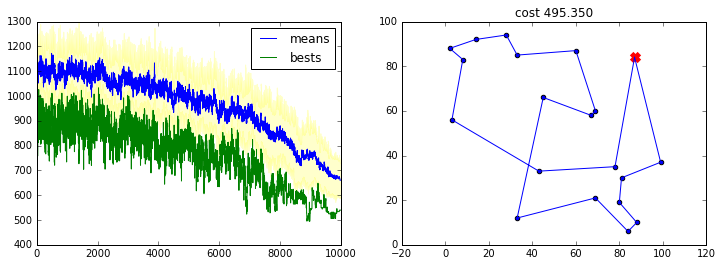

In [13]:
%run code/sa.py

n_individuals = 20
n_cooling_steps = 10000

bestsol, bests, means, stds = run_sa(n_individuals              = n_individuals, 
                                     n_cooling_steps            = n_cooling_steps, 
                                     init_population_function   = lambda x: TSP_initialize_population(x, n_cities), 
                                     cost_function              = lambda x: TSP_cost(cities, x),
                                     generate_neighbor_function = TSP_neighbour)


TSP_plot_result(bestsol, bests, means, stds)

In [18]:
%run code/sa.py

n_individuals = 40
n_cooling_steps = 10000


bestsol, bests, means, stds = run_sa(n_individuals              = n_individuals, 
                                     n_cooling_steps            = n_cooling_steps, 
                                     init_population_function   = lambda x: TSP_initialize_population(x, n_cities), 
                                     cost_function              = lambda x: TSP_cost(cities, x),
                                     generate_neighbor_function = TSP_neighbour2)


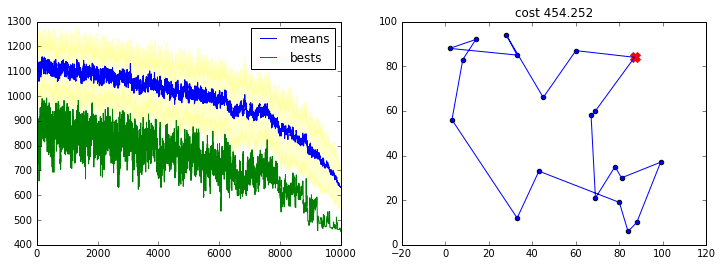

In [19]:
TSP_plot_result(bestsol, bests, means, stds)

## Con muchos individuos y no tantos pasos de enfrieamiento
(puede demorar uno o dos minutos)

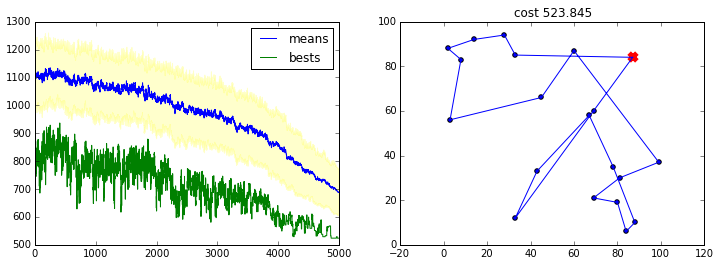

In [12]:
%run code/sa.py

n_individuals = 100
n_cooling_steps = 5000

bestsol, bests, means, stds = run_sa(n_individuals              = n_individuals, 
                                     n_cooling_steps            = n_cooling_steps, 
                                     init_population_function   = lambda x: TSP_initialize_population(x, n_cities), 
                                     cost_function              = lambda x: TSP_cost(cities, x),
                                     generate_neighbor_function = TSP_neighbour)


TSP_plot_result(bestsol, bests, means, stds)